# Análisis Exploratorio de Datos (EDA)


In [5]:
import pandas as pd
url = "https://raw.githubusercontent.com/julietcass71/EXAMEN_PARCIAL_AA_CASSANO_NANCY_JULIETA/main/data/raw/dataset_prestaciones_extrahospitalarias_2025_realista_v1.csv"
df = pd.read_csv(url)
df.head()


,id_solicitud,fecha_solicitud,zona,hospital_origen,edad,estado_civil,dni_domicilio_tdf,disponible_en_red_publica,tiene_cobertura_inicial,verificacion_cobertura_dir,...,grupo_familiar_a_cargo,ingresos_mensuales,egresos_mensuales,ocupacion,cud,vivienda_tipo,vehiculos_cantidad,informe_social_ok,documentacion_completa,autorizar
0,SOL-2025-000001,2025-04-13,sur,CAPS_Tolhuin,50,soltero/a,1,1,1,S,...,0,459236.68,NaN,rel_depend,0,cedida,2.0,0,0,0
1,SOL-2025-000002,2025-09-28,norte,CAPS_Ushuaia,44,casado/a,1,1,0,0,...,0,752963.07,499045.97,informal,0,propia,1.0,1,1,1
2,SOL-2025-000003,2025-04-17,sr,CAPS_RioGrande,54,casado/a,1,0,0,0,...,2,821782.65,526301.37,desocupado,1,propia,0.0,1,1,1
3,SOL-2025-000004,2025-03-13,norte,HRU,22,divorciado/a,1,1,1,0,...,2,266043.52,112221.27,monotributo,1,alquilada,0.0,1,1,1
4,SOL-2025-000005,2025-07-08,sur,CAPS_Ushuaia,36,NaN,1,0,0,0,...,1,1480482.61,1288777.81,rel_depend,1,propia,0.0,1,1,1


In [6]:
# Info general, nulos y tipos
import pandas as pd, numpy as np
from IPython.display import display

print("Shape:", df.shape)
display(df.dtypes.to_frame("dtype"))

nul = df.isna().sum().sort_values(ascending=False).to_frame("nulos")
nul["%"] = (nul["nulos"]/len(df)*100).round(2)
display(nul.head(20))


Shape: (1200, 21)


,dtype
id_solicitud,object
fecha_solicitud,object
zona,object
hospital_origen,object
edad,int64
estado_civil,object
dni_domicilio_tdf,object
disponible_en_red_publica,object
tiene_cobertura_inicial,object
verificacion_cobertura_dir,object


,nulos,%
vehiculos_cantidad,84,7.00
egresos_mensuales,84,7.00
ocupacion,84,7.00
ingresos_mensuales,84,7.00
estado_civil,84,7.00
disponible_en_red_publica,11,0.92
cud,11,0.92
informe_social_ok,10,0.83
tiene_cobertura_inicial,8,0.67
documentacion_completa,8,0.67


**Descripción inicial del conjunto de datos**

**Estructura y tipos**

-El dataset tiene 1.200 filas y 21 columnas.

-Hay varias columnas lógicas/booleanas guardadas como object (disponible_en_red_publica, tiene_cobertura_inicial, dni_domicilio_tdf, verificacion_cobertura_dir, derecho_cobertura_dir, documentacion_completa, informe_social_ok, cud), lo que sugiere valores mixtos (0/1, True/False, S/N).

-fecha_solicitud aparece como object: conviene cambiar a fecha para permitir análisis temporales.

**Nulos**

-El bloque principal de nulos (7%) se concentra en: vehiculos_cantidad, egresos_mensuales, ingresos_mensuales, ocupacion, estado_civil (84 casos cada una). Esto sugiere que son los mismos 84 registros con varios campos faltantes.

-Nulos bajos (<1%) en: disponible_en_red_publica (0,92%), cud (0,92%), informe_social_ok (0,83%), tiene_cobertura_inicial (0,67%), documentacion_completa (0,67%), verificacion_cobertura_dir (0,58%), dni_domicilio_tdf (0,58%), derecho_cobertura_dir (0,50%).

-El resto (incluyendo edad, hospital_origen, zona, id_solicitud, fecha_solicitud, grupo_familiar_a_cargo, vivienda_tipo) no presenta nulos.

**Implicancias y plan de tratamiento**

* Tipificación:

   -Unificar lógicas a 0/1 (mapear 1/0/True/False/S/N/NaN).

   -fecha_solicitud: datetime.

* Imputación:

   -Numéricas (ingresos_mensuales, egresos_mensuales, vehiculos_cantidad): mediana (robusta a outliers).

   -Categóricas (ocupacion, estado_civil y lógicas con <1% de nulos): modo o categoría “Desconocido”.

* Calidad: el patrón “84 en varios campos” sugiere filas con carga incompleta. Conviene marcar esas filas (fila_incompleta_84=1) para que el modelo capture el efecto “información faltante” sin eliminar casos.

**Conclusión:**
La calidad de datos es buena, con nulos concentrados y mayormente tratables, no hay nulos en identificadores ni en variables estructurales (zona/hospital/fecha). Tras tipificar e imputar, el dataset quedaría listo para modelado.

In [7]:
# Columnas numéricas y categóricas + descriptivos
num_cols = df.select_dtypes(include="number").columns.tolist()
cat_cols = df.select_dtypes(exclude="number").columns.tolist()
print("Numéricas:", num_cols)
print("Categóricas:", cat_cols)

desc_num = df[num_cols].describe().T.round(2)
display(desc_num)

# Top categorías (primeras 10 columnas)
for c in cat_cols[:10]:
    vc = df[c].value_counts(dropna=False)
    display(pd.DataFrame({"frecuencia": vc, "%": (vc/len(df)*100).round(2)}).head(20).rename_axis(c))


Numéricas: ['edad', 'grupo_familiar_a_cargo', 'ingresos_mensuales', 'egresos_mensuales', 'vehiculos_cantidad', 'autorizar']
Categóricas: ['id_solicitud', 'fecha_solicitud', 'zona', 'hospital_origen', 'estado_civil', 'dni_domicilio_tdf', 'disponible_en_red_publica', 'tiene_cobertura_inicial', 'verificacion_cobertura_dir', 'derecho_cobertura_dir', 'ocupacion', 'cud', 'vivienda_tipo', 'informe_social_ok', 'documentacion_completa']


,count,mean,std,min,25%,50%,75%,max
edad,1200.0,44.18,17.63,0.00,32.00,44.00,56.00,95.00
grupo_familiar_a_cargo,1200.0,1.36,1.18,0.00,0.00,1.00,2.00,4.00
ingresos_mensuales,1116.0,994862.38,576183.36,-1551036.77,617202.75,879498.12,1242573.79,4359722.56
egresos_mensuales,1116.0,729349.13,444255.44,69565.34,425721.56,635051.86,916262.36,4446665.77
vehiculos_cantidad,1116.0,0.58,0.81,0.00,0.00,0.00,1.00,3.00
autorizar,1200.0,0.91,0.29,0.00,1.00,1.00,1.00,1.00


,frecuencia,%
id_solicitud,,
SOL-2025-001184,1,0.08
SOL-2025-001183,1,0.08
SOL-2025-001182,1,0.08
SOL-2025-001181,1,0.08
SOL-2025-001180,1,0.08
SOL-2025-001179,1,0.08
SOL-2025-001178,1,0.08
SOL-2025-001177,1,0.08
SOL-2025-001176,1,0.08


,frecuencia,%
fecha_solicitud,,
2025-02-08,11,0.92
2025-08-03,11,0.92
2025-08-15,10,0.83
2025-04-09,9,0.75
2025-02-23,9,0.75
2025-09-21,9,0.75
2025-04-23,9,0.75
2025-06-01,9,0.75
2025-03-04,9,0.75


,frecuencia,%
zona,,
norte,650,54.17
sur,526,43.83
NORTE,10,0.83
sr,7,0.58
Sur,7,0.58


,frecuencia,%
hospital_origen,,
HRRG,399,33.25
HRU,364,30.33
CAPS_RioGrande,201,16.75
CAPS_Ushuaia,185,15.42
CAPS_Tolhuin,51,4.25


,frecuencia,%
estado_civil,,
soltero/a,524,43.67
casado/a,327,27.25
divorciado/a,117,9.75
conviviente,100,8.33
NaN,84,7.00
viudo/a,48,4.00


,frecuencia,%
dni_domicilio_tdf,,
1,1060,88.33
0,116,9.67
NaN,7,0.58
N,6,0.50
True,4,0.33
False,4,0.33
S,3,0.25


,frecuencia,%
disponible_en_red_publica,,
0,884,73.67
1,292,24.33
NaN,11,0.92
False,5,0.42
S,3,0.25
True,3,0.25
N,2,0.17


,frecuencia,%
tiene_cobertura_inicial,,
0,1052,87.67
1,124,10.33
NaN,8,0.67
True,5,0.42
S,5,0.42
False,3,0.25
N,3,0.25


,frecuencia,%
verificacion_cobertura_dir,,
0,1002,83.50
1,174,14.50
NaN,7,0.58
S,6,0.50
N,6,0.50
False,3,0.25
True,2,0.17


,frecuencia,%
derecho_cobertura_dir,,
0,1036,86.33
1,140,11.67
S,8,0.67
NaN,6,0.50
N,4,0.33
False,3,0.25
True,3,0.25


**Variables numéricas y categóricas**

El dataset contiene 1.200 registros y una combinación equilibrada de variables numéricas y categóricas.

Entre las numéricas se encuentran edad, grupo_familiar_a_cargo, ingresos_mensuales, egresos_mensuales, vehiculos_cantidad y autorizar.

-Edad: promedio 44 años, rango 0-95. Se observan valores mínimos extremos (edad 0), posiblemente registros de niños menores de 1 año de edad.

-Ingresos mensuales: media = 995 mil y desviación estándar elevada (= 576 mil), lo que indica fuerte dispersión económica.

-Egresos mensuales: media = 724 mil $, también muy dispersa y altamente correlacionada con los ingresos.

-Vehículos: promedio 0,58 por familia, la mayoría sin vehículos o con solo uno.


Las categóricas muestran buena variabilidad:

-Zona: norte 54 %, sur 43 %. Se detectan variantes de escritura (NORTE, Sur, sr) que convendría normalizar.

-Hospital de origen: predominan HRRG (33 %) y HRU (30 %), seguidos por los CAPS de Río Grande y Ushuaia.

-Estado civil: mayormente solteros/as (44 %) y casados/as (27 %).

-DNI con domicilio en TDF: 88 % de los casos, coherente con el criterio de residencia.

--Disponible en red pública: 74 % no disponible, es decir, la mayoría de las prestaciones se solicitan por falta de oferta en el sistema provincial.

Tiene cobertura inicial: 87 % sin cobertura, coherente con la población objetivo (personas sin obra social ni prepaga).

**Conclusión parcial:** La estructura general es consistente con el dominio. Existen pequeñas inconsistencias de formato en variables categóricas (mayúsculas, abreviaturas), pero sin categorías inconsistentes.

autorizar
1    1092
0     108
Name: count, dtype: int64
autorizar
1    91.0
0     9.0
Name: count, dtype: float64


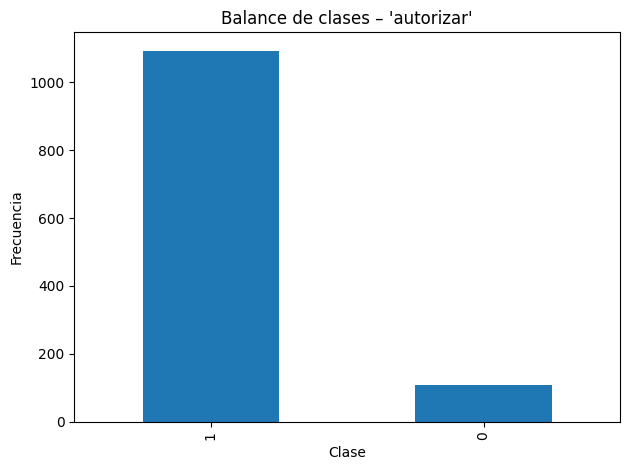

In [8]:
# Balance del target y gráfico
import matplotlib.pyplot as plt

assert "autorizar" in df.columns, "Falta la columna 'autorizar'."
bal = df["autorizar"].value_counts(dropna=False)
print(bal)
print((bal/len(df)*100).round(2))

plt.figure()
bal.plot(kind="bar")
plt.title("Balance de clases – 'autorizar'")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


**Balance de clases en autorizar**

Distribución: 1 (autorizado) = 1.092 casos (91 %), 0 (no autorizado) = 108 casos (9 %).

El dataset está fuertemente desbalanceado a favor de la clase positiva.
Esto refleja fielmente la realidad operativa: la mayoría de las solicitudes son aprobadas, ya que los servicios sociales filtran previamente los casos elegibles antes de elevarlos a la Dirección de Prestaciones.

**Interpretación:**
El modelo deberá contemplar este desbalance mediante re-muestreo (undersampling/oversampling) o ajuste de pesos de clase.
Durante la evaluación se recomienda priorizar métricas como Precision–Recall o F1-score, más sensibles que la accuracy en escenarios desbalanceados.

In [9]:
# Outliers por IQR en variables clave
def iqr_outliers(s):
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
    return (s < low) | (s > high)

for col in [c for c in ["edad", "ingresos_mensuales"] if c in df.columns]:
    m = iqr_outliers(df[col])
    print(f"{col}: outliers={m.sum()} ({round(m.mean()*100,2)}%)")


edad: outliers=3 (0.25%)
ingresos_mensuales: outliers=50 (4.17%)


**Valores atípicos (IQR)**

-Edad: 3 outliers (0,25 %), valores extremos (probablemente menores de un año de edad edad o registros erróneos).

-Ingresos mensuales: 50 outliers (4,2 %): picos altos de ingresos.

**Interpretación:**
Los atípicos se concentran en variables económicas y demográficas.
En contextos administrativos, no deben eliminarse automáticamente, ya que pueden representar casos reales (por ejemplo, beneficiarios con ingresos informales o situaciones transitorias).
Se sugiere usar técnicas robustas a outliers, como transformaciones logarítmicas en ingresos o modelos basados en árboles (Random Forest).

,edad,grupo_familiar_a_cargo,ingresos_mensuales,egresos_mensuales,vehiculos_cantidad,autorizar
edad,1.00,-0.00,-0.02,-0.05,0.04,-0.03
grupo_familiar_a_cargo,-0.00,1.00,0.03,0.02,0.02,-0.00
ingresos_mensuales,-0.02,0.03,1.00,0.87,-0.01,-0.04
egresos_mensuales,-0.05,0.02,0.87,1.00,-0.04,-0.06
vehiculos_cantidad,0.04,0.02,-0.01,-0.04,1.00,0.01
autorizar,-0.03,-0.00,-0.04,-0.06,0.01,1.00


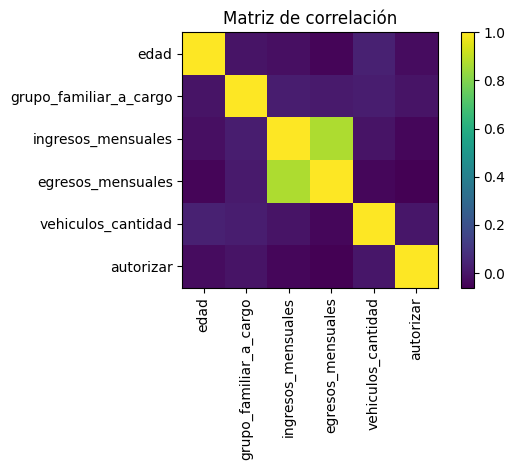

In [10]:
# Correlación numérica
if len(num_cols) >= 2:
    corr = df[num_cols].corr(numeric_only=True)
    display(corr.round(2))

    plt.figure()
    plt.imshow(corr, interpolation="nearest")
    plt.xticks(range(len(num_cols)), num_cols, rotation=90)
    plt.yticks(range(len(num_cols)), num_cols)
    plt.title("Matriz de correlación")
    plt.colorbar()
    plt.tight_layout()
    plt.show()


**Matriz de correlación**

El mapa muestra intensidades bajas (violetas) salvo un bloque amarillo entre ingresos_mensuales y egresos_mensuales, lo que ya sugiere poca colinealidad general y una única pareja fuertemente correlacionada.

Pares relevantes:

- ingresos_mensuales - egresos_mensuales = 0.87 (muy alta)
Ambas variables miden el nivel económico, aportan información redundante.

En modelos lineales conviene dejar una sola (o derivar un feature como "ahorro" o "saldo" = ingresos - egresos, o una razón egresos/ingresos).

- Numéricas con autorizar (target binario 0/1):

edad = -0.03, ingresos_mensuales = -0.04, egresos_mensuales = -0.06, vehiculos_cantidad = +0.01, grupo_familiar_a_cargo = -0.00.
Asociaciones lineales prácticamente nulas (correlaciones en el rango -0.06 - +0.01).

El componente lineal de estas numéricas no explica la decisión. La señal más importante probablemente esté en categóricas de elegibilidad/disponibilidad (p. ej., disponible_en_red_publica, tiene_cobertura_inicial, verificaciones de cobertura), o en interacciones/no linealidades de las numéricas.

-Otras correlaciones entre numéricas:
edad con otras numéricas (-0.05 a +0.04) y vehiculos_cantidad con el resto (-0.04 a +0.04) son bajas, no hay pares redundantes adicionales.

Baja multicolinealidad global. Excepto ingresos-egresos, el resto de pares no compromete modelos lineales/regularizados.

**Conclusión:**

La única colinealidad material es ingresos-egresos.

Las numéricas aisladas tienen bajo poder lineal para predecir autorizar, la señal vendrá de reglas de elegibilidad y de interacciones o umbrales sobre variables económicas.

<Figure size 640x480 with 0 Axes>

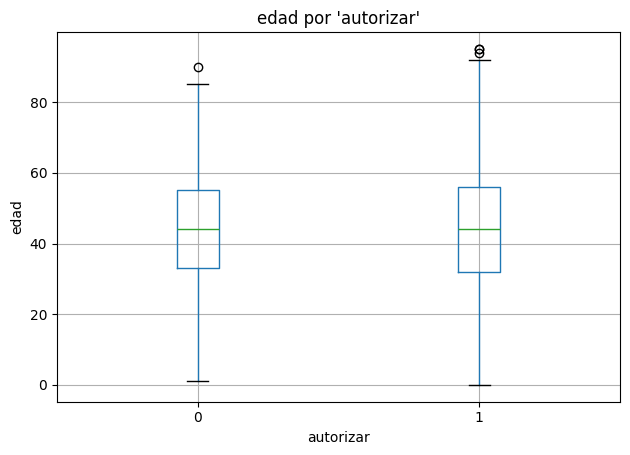

<Figure size 640x480 with 0 Axes>

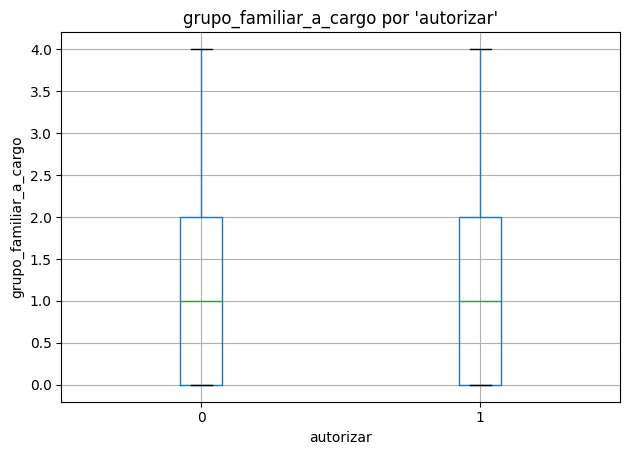

<Figure size 640x480 with 0 Axes>

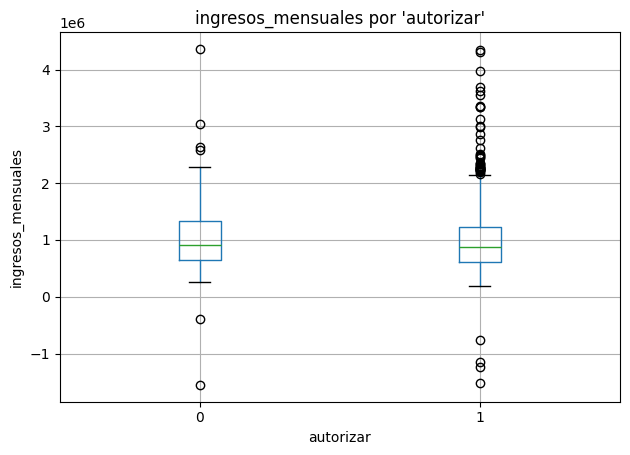

<Figure size 640x480 with 0 Axes>

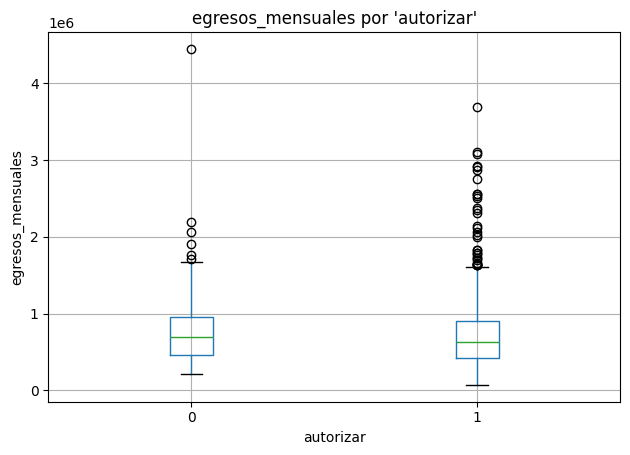

<Figure size 640x480 with 0 Axes>

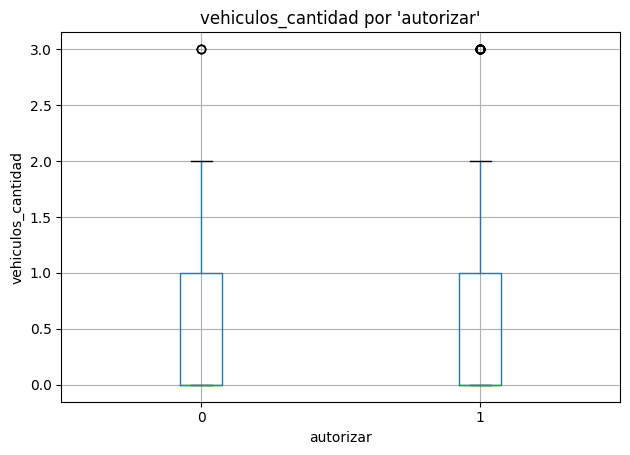

<Figure size 640x480 with 0 Axes>

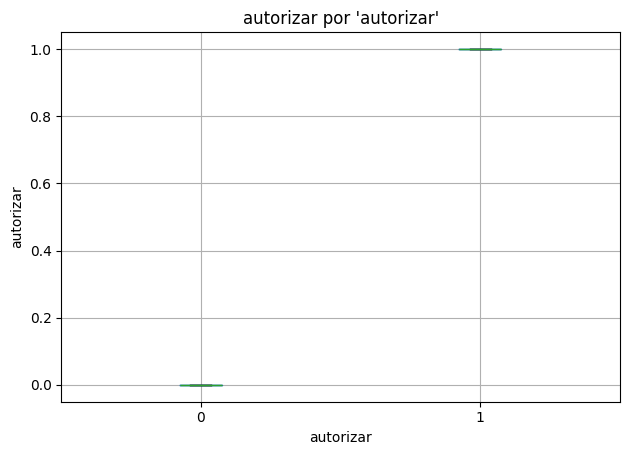

In [11]:
# Boxplots por clase
if "autorizar" in df.columns:
    for col in [c for c in num_cols if c not in ["md5_in","md5_out"]][:6]:
        plt.figure()
        df.boxplot(column=col, by="autorizar")
        plt.title(f"{col} por 'autorizar'")
        plt.suptitle("")
        plt.xlabel("autorizar")
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()


**Distribución por clase (boxplots)**

**-edad por autorizar**

Las distribuciones de edad son muy similares entre autorizados y no autorizados. La mediana ronda los 40-45 años en ambos grupos, con algunos outliers altos (70 - >90). No se observa un efecto etario claro sobre la decisión.

**Conclusión:** la variable edad aporta poca señal por sí sola; su efecto, si existe, será marginal o interactivo con otras covariables.

**-grupo_familiar_a_cargo por autorizar**

Cajas prácticamente idénticas en posición y dispersión. La mediana se mantiene alrededor de 1 integrante a cargo en ambos grupos y el rango (0-4) es similar.

**Conclusión:** sin diferencias relevantes; baja utilidad predictiva de esta variable en forma aislada.

**-ingresos_mensuales por autorizar**

Distribuciones muy asimétricas (cola derecha larga) con muchos outliers altos en ambos grupos. Las medianas son parecidas. Si hay diferencia, es leve.

**Conclusión:** la señal directa de ingresos_mensuales vs. la decisión no es fuerte. Conviene:

-aplicar transformación log (para estabilizar varianza y reducir efecto de outliers),

-combinar con egresos_mensuales en ratios (p. ej., ingresos – egresos, o ingresos/egresos),

-dejar que modelos no lineales capten umbrales o interacciones.

**-egresos_mensuales por autorizar**

Patrón similar a ingresos: gran dispersión y outliers hacia arriba, medianas muy cercanas entre clases. Dado que ingresos y egresos están fuertemente correlacionados (0,87), aportan información similar.

**Conclusión:** priorizar una de las dos o crear variables compuestas (p. ej., saldo = ingresos - egresos, o tasa de esfuerzo = egresos/ingresos).

**-vehiculos_cantidad por autorizar**

La mayor parte de los casos está en 0 vehículos, con una minoría en 1-2 (y outliers = 3). Las cajas son virtualmente iguales entre clases.

**Conclusión:** señal muy débil, útil solo como co-variable en modelos con muchas variables.

**-autorizar por autorizar**

Este gráfico es redundante (variable vs. sí misma) y no aporta información.

In [2]:
import pandas as pd
from pathlib import Path

try:
    df
except NameError:
    RAW_URL = "https://raw.githubusercontent.com/julietcass71/EXAMEN_PARCIAL_AA_CASSANO_NANCY_JULIETA/main/data/raw/dataset_prestaciones_extrahospitalarias_2025_realista_v1.csv"
    df = pd.read_csv(RAW_URL)
    print("Cargado df desde GitHub RAW:", RAW_URL)

# 2) Normalizar columnas booleanas mixtas (0/1/True/False/S/N/Si/Sí/N)
def norm_bool_col(s):
    # convierte todo a string y estandariza
    x = s.astype(str).str.strip().str.lower()
    x = (x
         .replace({"true":"1","false":"0","s":"1","n":"0","si":"1","sí":"1"})
         .replace({"none":"", "nan":""}))
    # map a 0/1 (deja NaN si algo no mapea)
    x = x.map({"1":1,"0":0})
    return x

for col in ["disponible_en_red_publica","tiene_cobertura_inicial",
            "verificacion_cobertura_dir","derecho_cobertura_dir"]:
    if col in df.columns:
        df[col] = norm_bool_col(df[col])

# 3) Función de tasa de autorización por nivel
def tasa_autorizacion_por(col):
    assert "autorizar" in df.columns, "Falta la columna 'autorizar'."
    tab = pd.crosstab(df[col], df["autorizar"], normalize="index").mul(100).round(1)
    # renombrar columnas del crosstab (0/1)
    tab = tab.rename(columns={0:"% no autoriza", 1:"% autoriza"})
    # ordenar de mayor a menor tasa de autorización
    return tab.sort_values("% autoriza", ascending=False)

# 4) Mostrar tablas clave
for c in ["disponible_en_red_publica","tiene_cobertura_inicial",
          "verificacion_cobertura_dir","derecho_cobertura_dir",
          "hospital_origen","zona"]:
    if c in df.columns:
        print(f"\n==== {c} ====")
        display(tasa_autorizacion_por(c).head(10))



Cargado df desde GitHub RAW: https://raw.githubusercontent.com/julietcass71/EXAMEN_PARCIAL_AA_CASSANO_NANCY_JULIETA/main/data/raw/dataset_prestaciones_extrahospitalarias_2025_realista_v1.csv

==== disponible_en_red_publica ====


autorizar,% no autoriza,% autoriza
disponible_en_red_publica,,
0.0,6.2,93.8
1.0,17.4,82.6



==== tiene_cobertura_inicial ====


autorizar,% no autoriza,% autoriza
tiene_cobertura_inicial,,
0.0,9.0,91.0
1.0,9.7,90.3



==== verificacion_cobertura_dir ====


autorizar,% no autoriza,% autoriza
verificacion_cobertura_dir,,
0.0,6.2,93.8
1.0,24.2,75.8



==== derecho_cobertura_dir ====


autorizar,% no autoriza,% autoriza
derecho_cobertura_dir,,
0.0,6.9,93.1
1.0,23.2,76.8



==== hospital_origen ====


autorizar,% no autoriza,% autoriza
hospital_origen,,
CAPS_Tolhuin,7.8,92.2
HRRG,8.0,92.0
HRU,8.2,91.8
CAPS_Ushuaia,9.2,90.8
CAPS_RioGrande,12.4,87.6



==== zona ====


autorizar,% no autoriza,% autoriza
zona,,
NORTE,0.0,100.0
Sur,0.0,100.0
sr,0.0,100.0
norte,8.9,91.1
sur,9.5,90.5


**Lectura de las tablas de tasas:**

**-disponible_en_red_publica**

0: 93,8 % autoriza (6,2 % no).

1: 82,6 % autoriza (17,4 % no).

**Interpretación:** cuando la prestación no está disponible en la red pública, la autorización sube 11,2 pp. Es coherente con el criterio operativo: si el sistema público no lo brinda, se autoriza extrahospitalario.

**-tiene_cobertura_inicial**

0: 91,0 % autoriza

1:90,3 % autoriza

**Interpretación:** el efecto es muy leve (0,7 pp). La “cobertura inicial” no distingue tanto como la verificación/derecho de cobertura de la Dirección. Puede haber ruido por valores mezclados (0/1/True/False/S/N), ya están normalizados, pero igual la señal es chica.

**-verificacion_cobertura_dir**

0: 93,8 % autoriza

1: 75,8 % autoriza

**Interpretación:** cuando la Dirección verifica cobertura (1), la autorización baja 18 pp. Tiene sentido: si hay cobertura vigente, no corresponde autorizar por extrahospitalario.

**-derecho_cobertura_dir**

0: 93,1 % autoriza

1: 76,8 % autoriza

**Interpretación:** si la Dirección confirma derecho a cobertura (1), la autorización también cae 16,3 pp. Reafirma que los flags administrativos de cobertura son determinantes en la decisión.

**-hospital_origen**

CAPS_Tolhuin 92,2 %, HRRG 92,0 %, HRU 91,8 %, CAPS_Ushuaia 90,8 %, CAPS_RioGrande 87,6 %.

**Interpretación:** hay diferencias moderadas (4-5 pp) entre establecimientos. Puede reflejar mix de casos o criterios/derivaciones locales. Conviene controlar por hospital en el modelado y revisar posibles sesgos operativos.

**-zona**

Inconsistencia de escritura:
Se observan valores duplicados por diferencias de mayúsculas/minúsculas o variantes ("NORTE"/"norte", "Sur"/"sur", "sr"). Esto indica que antes del modelado conviene normalizar la variable zona (por ejemplo, df["zona"] = df["zona"].str.lower().str.strip()) para evitar que el algoritmo las trate como categorías distintas.

Los grupos homogéneos “norte” y “sur” tienen tasas de autorización muy similares: 91,1 % vs. 90,5 %, diferencia de solo 0,6 puntos porcentuales.

Los registros con valores mal codificados (“NORTE”, “Sur”, “sr”) muestran 100 % de autorización, pero probablemente se trate de pocos casos o de ruido tipográfico en el dataset.

**Interpretación:**

No hay evidencia de sesgo por zona geográfica: la proporción de solicitudes autorizadas es prácticamente igual en el norte y en el sur de la provincia.

Las pequeñas diferencias pueden deberse a volumen distinto de trámites, errores de carga o tipificación inconsistente.

**Recomendación:** Unificar categorías y luego evaluar si la variable conserva varianza informativa. Dada la similitud de tasas, “zona” probablemente no aporte mucha señal predictiva y podría descartarse o usarse solo como control de equilibrio territorial.

**Conclusión:**
La variable zona presenta leves inconsistencias de codificación pero, una vez normalizada, muestra una tasa de autorización uniforme en toda la provincia (91 %). Esto sugiere que el proceso de decisión no está condicionado por el lugar de residencia del paciente, sino por factores administrativos como cobertura o disponibilidad en red pública.

**Conclusión general:**

La señal más fuerte proviene de disponibilidad en red pública y de los chequeos de cobertura de la Dirección: cuando no hay disponibilidad o no hay derecho/cobertura, sube la autorización; cuando la hay, baja marcadamente.

Cobertura inicial (autoinformada) casi no mueve la aguja, pesa más la verificación formal.

Hospital de origen muestra diferencias operativas moderadas, útil incluirlo/codificarlo y monitorear fairness.

Esto refuerza lo visto en los boxplots y correlaciones: las numéricas dan poca señal lineal, la decisión es principalmente normativa/administrativa, capturada por estas categóricas.

In [12]:
# Duplicados y únicos
dups = df.duplicated().sum()
print("Duplicados:", dups)

uniq = df.nunique().sort_values(ascending=False).to_frame("n_unicos")
display(uniq.head(20))


Duplicados: 0


,n_unicos
id_solicitud,1200
egresos_mensuales,1116
ingresos_mensuales,1116
fecha_solicitud,271
edad,90
ocupacion,8
vivienda_tipo,7
documentacion_completa,6
informe_social_ok,6
derecho_cobertura_dir,6


**Duplicados y cardinalidad de variables**

El dataset presenta coherencia estructural: sin duplicados, con identificadores únicos y variedad razonable en las numéricas.

Varias variables booleanas muestran inconsistencia de formato, lo que justifica el paso de limpieza de valores lógicos (S/N, True/False, 0/1).

En conjunto, la calidad de los datos es muy buena para EDA y entrenamiento supervisado: hay diversidad suficiente y sin redundancias.

**Conclusión:**
El control de duplicados y cardinalidad confirma que la base de 1200 solicitudes es única, representativa y consistente, aunque requiere estandarizar valores lógicos y categorías textuales antes de entrenar el modelo.

In [13]:
# Resumen
resumen = []
resumen.append(f"Filas={len(df)}, Columnas={df.shape[1]}")
try:
    resumen.append(f"Target balance: {df['autorizar'].value_counts(normalize=True).round(3).to_dict()}")
except Exception as e:
    resumen.append("Target balance: N/D")
resumen.append(f"Nulos totales: {int(df.isna().sum().sum())}")
resumen.append(f"Numéricas: {len(num_cols)}, Categóricas: {len(cat_cols)}")

print("\n".join(resumen))


Filas=1200, Columnas=21
Target balance: {1: 0.91, 0: 0.09}
Nulos totales: 488
Numéricas: 6, Categóricas: 15


## Conclusiones del EDA

- Analicé **1.200 solicitudes** y **21 variables**. No hay **duplicados** y los **nulos** suman **488**, concentrados en un mismo grupo de 84 filas (mismos campos faltantes), lo que sugiere carga incompleta, dejo un flag para capturarlo en el modelado.
- El target `autorizar` está **desbalanceado** (**91%** autorizadas vs **9%** no autorizadas). Evaluaré modelos con **class_weight/re-muestreo** y métricas **Precision–Recall / F1** además de accuracy.
- En numéricas, detecté **outliers** esperables en `ingresos_mensuales` (**4,2%**) y muy pocos en `edad` (**0,25%**). Aplicaré **log-transform** en variables económicas y consideraré **variables derivadas** (p. ej., `ahorro = ingresos – egresos`, `tasa_esfuerzo = egresos/ingresos`).
- La única **colinealidad fuerte** es `ingresos_mensuales`–`egresos_mensuales` (**0,87**). El resto muestra correlaciones bajas con el target, la señal lineal de estas numéricas es limitada.
- La **señal principal** está en variables **administrativas**:
  - `disponible_en_red_publica`: **93,8%** autoriza cuando NO hay disponibilidad vs **82,6%** cuando SÍ hay.
  - `verificacion_cobertura_dir = 1` y `derecho_cobertura_dir = 1` reducen la autorización a **75,8%** y **76,8%** (caídas de 18 pp y 16 pp).
  - `hospital_origen` varía entre **87,6%–92,2%**, `zona` es prácticamente uniforme (norte **91,1%** vs sur **90,5%**). Normalicé inconsistencias de escritura.


**Validación de coherencia normativa**

**Expectativa:** Según la normativa, si hay disponibilidad en red pública, si existe cobertura/derecho de cobertura, o si la persona no tiene domicilio en TDF, la autorización debería ser rara/excepcional.

**Hallazgos en los datos:**

-Disponibilidad en red pública: En mi base, cuando hay disponibilidad la tasa de autorización baja de forma evidente, pero no cae a casi cero.

-Cobertura / derecho de cobertura: Los flags de la Dirección (verificación/derecho) reducen la autorización de forma marcada, aunque persisten autorizaciones en algunos casos.

-Domicilio en TDF: La variable dni_domicilio_tdf también muestra autorizaciones residuales cuando el domicilio no es TDF.

**Posibles explicaciones:**

-Codificación mixta (0/1, True/False, S/N) que puede haber invertido o “ensuciado” algunos valores antes de normalizar.

-Tamaños muestrales por nivel (pocos casos en ciertas combinaciones) que inflan porcentajes.

-Regla conjunta: la decisión no depende de una sola variable, sino de combinaciones (p. ej., disponible=1 y derecho_cobertura=1).

-Datos sintéticos con “excepciones”: el generador puede haber incorporado ruido para evitar que el problema sea trivial y mantener variabilidad para el aprendizaje.

**Qué haré en la siguiente entrega:**

-Auditaré la normalización 0/1 y repetiré los cruces condicionados (p. ej., disponibilidad x derecho/verificación).

-Entrenaré un árbol de decisión para evidenciar la regla dominante.

-Si se confirma desalineación en el generador, tendré que recalibrar el dataset o impondré variables derivadas o reglas (p. ej., regla_no_corresponde = disponible & derecho_cobertura) para que el modelo las capte.